In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle as pkl


In [4]:
import urllib.request

print('Beginning file download...')

url = 'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip'

urllib.request.urlretrieve(url, './traffic-signs-data.zip')

Beginning file download...


('./traffic-signs-data.zip', <http.client.HTTPMessage at 0x7ff7595e2710>)

In [5]:
import zipfile
import os


print('Beginning file unzip')

zip_ref = zipfile.ZipFile('./traffic-signs-data.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

print('Done')
os.listdir("./")

Beginning file unzip
Done


['.config',
 'test.p',
 'traffic-signs-data.zip',
 'train.p',
 'valid.p',
 'sample_data']

In [6]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [7]:
import numpy as np
import pandas as pd

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = x_train.shape[0]

# TODO: Number of validation examples
n_validation = x_valid.shape[0]

# TODO: Number of testing examples.
n_test = x_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = x_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [1]:
url = 'https://raw.githubusercontent.com/navoshta/traffic-signs/master/signnames.csv'
data = pd.read_csv(url)

NameError: ignored

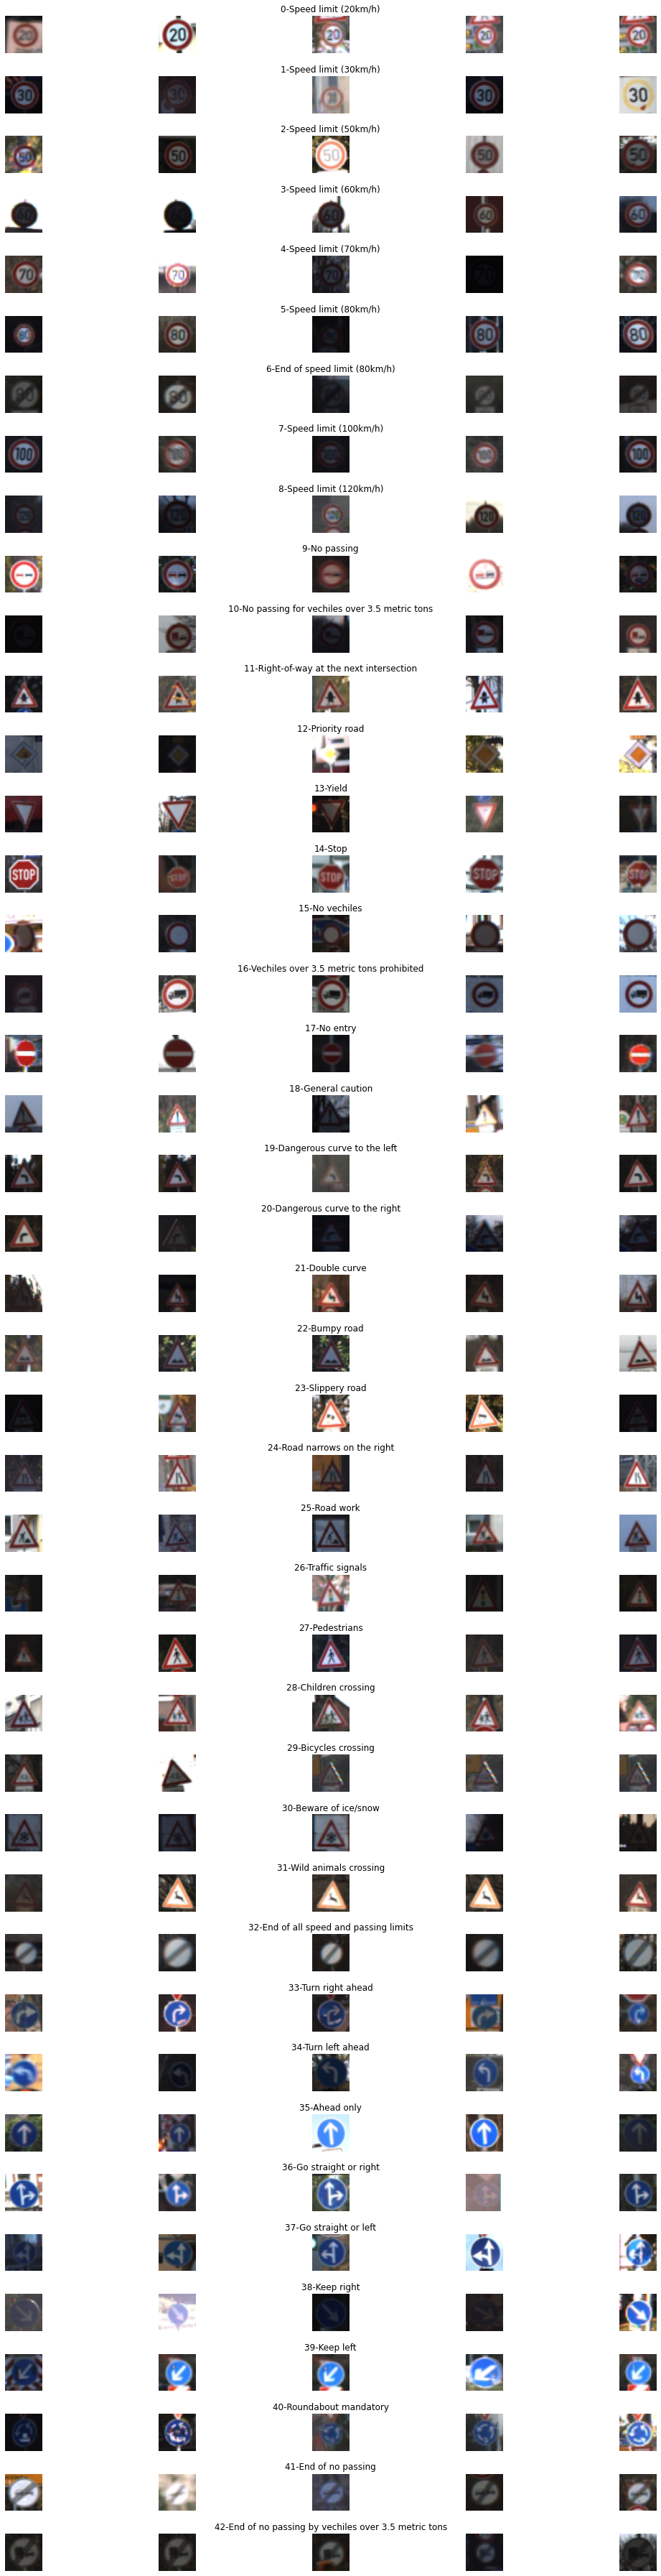

In [9]:
num_of_sample=[]

cols=5
num_classes=43
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(15,50))
fig.tight_layout()

for i in range(cols):
  for j,raw in data.iterrows():
    x_selected=x_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    
    if i==2:
      axs[j][i].set_title(str(j)+'-'+raw['SignName'])
      num_of_sample.append(len(x_selected))


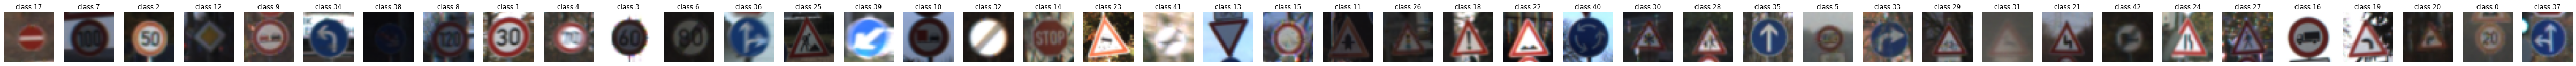

In [8]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    
    n_images = len(images)
    
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    
    fig = plt.figure(figsize=(2, 2))
    
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        a.grid(False)
        a.axis('off')
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image, cmap='gray')
        a.set_title(title)
    
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
def select_random_images_by_classes(features, labels, n_features):
  
  indexes = []
  _classes = np.unique(labels);
  
  while len(indexes) < len(_classes):
  
    index = random.randint(0, n_features-1)
    _class = labels[index]

    for i in range(0, len(_classes)):

      if _class == _classes[i]:
        _classes[i] = -1
        indexes.append(index)
        break

  images = []
  titles = []

  for i in range(0, len(indexes)):
    images.append(features[indexes[i]])
    titles.append("class " + str(labels[indexes[i]]))

  show_images(images, titles = titles)
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

select_random_images_by_classes(x_train, y_train, n_train)

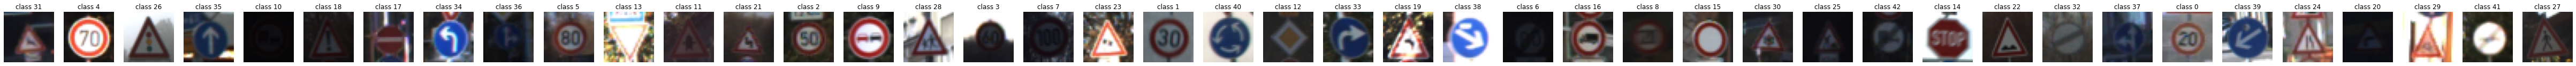

In [10]:
select_random_images_by_classes(x_train, y_train, n_train)

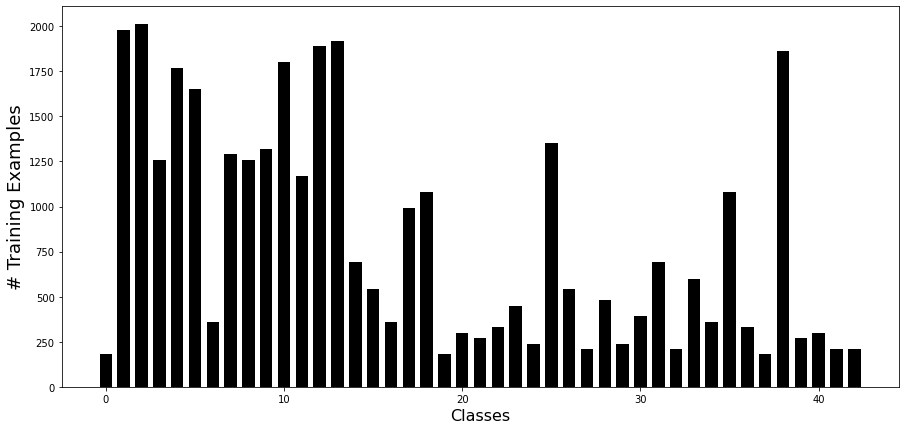

In [11]:
def plot_distribution_chart(x, y, xlabel, ylabel, width, color):
  
  plt.figure(figsize=(15,7))
  plt.ylabel(ylabel, fontsize=18)
  plt.xlabel(xlabel, fontsize=16)
  plt.bar(x, y, width, color=color)
  plt.show()
_classes, counts = np.unique(y_train, return_counts=True)

plot_distribution_chart(_classes, counts, 'Classes', '# Training Examples', 0.7, 'black')


In [12]:
import cv2

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
   
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img

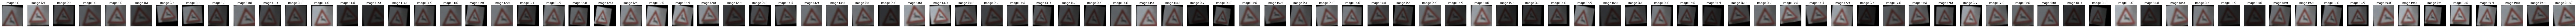

In [13]:
images = []

for i in range(0, 100):
  images.append(transform_image(x_train[555],10,5,5,brightness=1))

show_images(images)

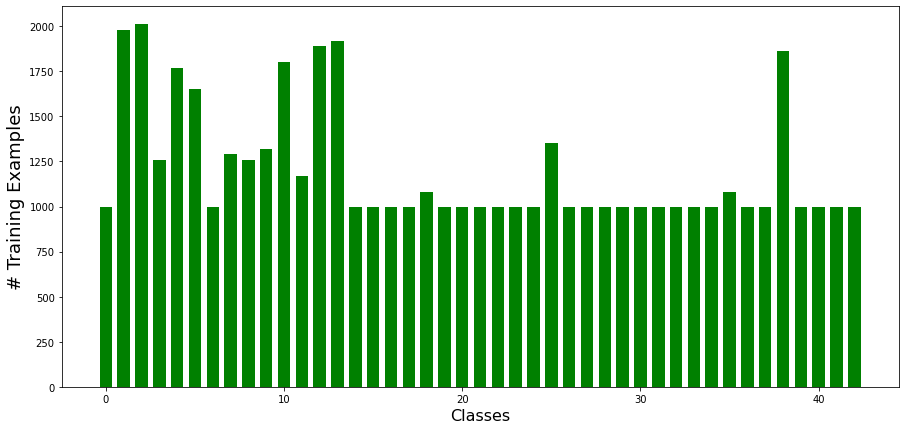

In [14]:
for _class, count in zip(_classes, counts):
  new_images = []
  new_classes = []
  
  if count < 1000:
    y_train_length = y_train.shape[0]
    index = 0
    
    for i in range(0, 1000-count):
      while y_train[index] != _class:
        index = random.randint(0, y_train_length-1)
      new_images.append(transform_image(x_train[index],10,5,5,brightness=1))
      new_classes.append(_class)
      
    x_train = np.concatenate((x_train, np.array(new_images)))
    y_train = np.concatenate((y_train, np.array(new_classes)))
    
_classes, counts = np.unique(y_train, return_counts=True)

plot_distribution_chart(_classes, counts, 'Classes', '# Training Examples', 0.7, 'green')

In [15]:
n_train = x_train.shape[0]

print("Number of training examples =", n_train)

Number of training examples = 51690


In [16]:
import cv2
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img
def equalize(img):
  img=cv2.equalizeHist(img)
  return img
def preprocess(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img
x_train=np.array(list(map(preprocess,x_train)))
x_test=np.array(list(map(preprocess,x_test)))
x_valid=np.array(list(map(preprocess,x_valid)))

In [17]:
x_train=x_train.reshape(51690,32,32,1)
x_test=x_test.reshape(12630,32,32,1)
x_valid=x_valid.reshape(4410,32,32,1)

In [18]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_valid=to_categorical(y_valid,43)

In [19]:
def le_net():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape = (32,32,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(43,activation='softmax')) 
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy']) # lr = learning rate
  return model

In [20]:
lenet =le_net()

In [21]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 540)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               270500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [22]:
history=lenet.fit(x_train,y_train,epochs=100,batch_size=128,verbose=1,shuffle=1,validation_data=(x_valid,y_valid))
lenet.save("/content/Traffic")

Epoch 1/100
404/404 [==============================] - 46s 115ms/step - loss: 1.2814 - accuracy: 0.6543 - val_loss: 0.6213 - val_accuracy: 0.8184
Epoch 2/100
404/404 [==============================] - 46s 114ms/step - loss: 0.2840 - accuracy: 0.9167 - val_loss: 0.4190 - val_accuracy: 0.8721
Epoch 3/100
404/404 [==============================] - 48s 118ms/step - loss: 0.1465 - accuracy: 0.9567 - val_loss: 0.3655 - val_accuracy: 0.8839
Epoch 4/100
404/404 [==============================] - 47s 116ms/step - loss: 0.0913 - accuracy: 0.9732 - val_loss: 0.3319 - val_accuracy: 0.8884
Epoch 5/100
404/404 [==============================] - 47s 115ms/step - loss: 0.0646 - accuracy: 0.9809 - val_loss: 0.2752 - val_accuracy: 0.9145
Epoch 6/100
404/404 [==============================] - 46s 114ms/step - loss: 0.0507 - accuracy: 0.9843 - val_loss: 0.2941 - val_accuracy: 0.9136
Epoch 7/100
404/404 [==============================] - 50s 123ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.2334 -

Text(0.5, 0, 'epoch')

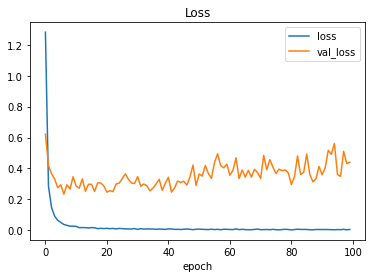

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

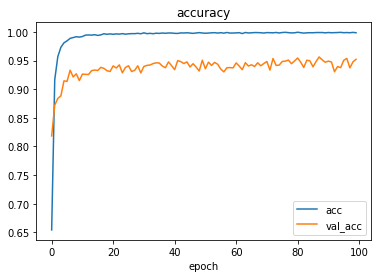

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.title('accuracy')
plt.xlabel('epoch')

In [28]:
import requests
from PIL import Image

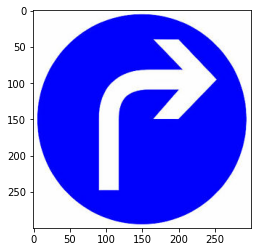

In [29]:
url="https://i.ebayimg.com/images/g/8u4AAMXQlgtS9Ko7/s-l300.jpg"
response=requests.get(url,stream=True)
img=Image.open(response.raw)
plt.imshow(img)

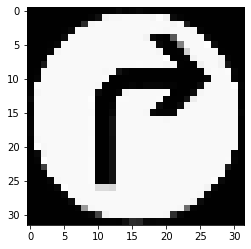

In [30]:

import cv2
img_array=np.asarray(img)
res=cv2.resize(img_array,(32,32))
gray=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
image=cv2.bitwise_not(gray)
plt.imshow(image,cmap=plt.get_cmap('gray'))

In [69]:
#image=image/255
image=image.reshape(1,32,32,1)
str(lenet.predict_classes(image))
i=str(lenet.predict_classes(image))
print(i)


[32]
